# Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import datetime
from sklearn.model_selection import train_test_split

In [2]:
housing_df = pd.read_csv(r"F:\Data Science Grand Track\Machine Learning\datasets\housing\hdb\hdb_resale_data_cleaned.csv")

In [3]:
display(housing_df)

,Unnamed: 0,floor_area_sqm,room_count,age,resale_price
0,0,44.0,2,46,232000.0
1,1,67.0,3,47,250000.0
2,2,67.0,3,45,262000.0
3,3,68.0,3,45,265000.0
4,4,67.0,3,45,265000.0
...,...,...,...,...,...
201129,216822,122.0,5,37,735000.0
201130,216823,122.0,5,38,755000.0
201131,216824,127.0,5,37,735000.0
201132,216825,127.0,5,37,795000.0


# Extract features
Say, for the purpose of this snippet, we want to demo the correlation of flat size and price.

## Creating X, y

In [4]:
X = housing_df['floor_area_sqm'].values
y = housing_df['resale_price'].values

## Check shape:

In [5]:
print(X.shape)
print(y.shape)

(201134,)
(201134,)


## Reshape X

In [6]:
X = X.reshape(-1,1)

## Testing X

In [7]:
display(X)
print(X.shape)

array([[ 44.],
       [ 67.],
       [ 67.],
       ...,
       [127.],
       [127.],
       [127.]])

(201134, 1)


# Create model:

## Creating an object

In [8]:
# Creating an object
predict_price = LinearRegression()

## Split data into train and test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Fit testing data to model (train the model)

In [10]:
predict_price.fit(X_train, y_train)

LinearRegression()

## Using model on all of X

In [11]:
y_pred = predict_price.predict(X)

# Plotting:

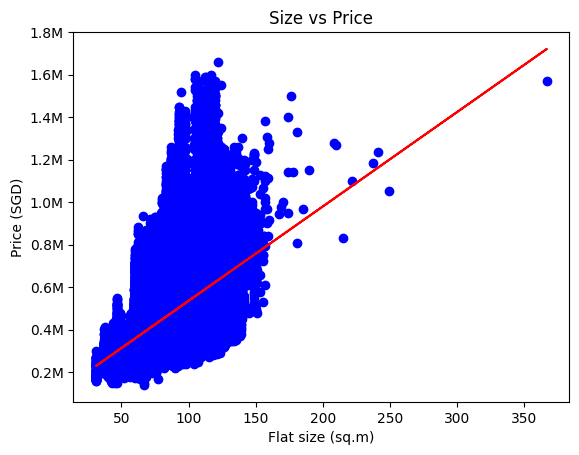

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np # Assuming X, y, and predicted_price are NumPy arrays

# --- Setup the Figure and Axes ---
# Create the figure (fig) and the axes (ax)
fig, ax = plt.subplots()

# Scatter plot of raw (untrained data)
ax.scatter(X, y, color="blue")

# Prediction line of X and y_pred
ax.plot(X, y_pred, color="red")

# Labeling:
ax.set_title("Size vs Price")
ax.set_xlabel("Flat size (sq.m)")
ax.set_ylabel("Price (SGD)")

# --- Scaling/Formatting the Y-Axis Ticks ---
def millions_formatter(x, pos):
    'The two args are the value and tick position'
    # Format the number to one decimal place and append 'M' for million
    return f'{x/1000000:1.1f}M'

# Create the formatter
formatter = ticker.FuncFormatter(millions_formatter)

# Apply the formatter to the y-axis
ax.yaxis.set_major_formatter(formatter)

# --- Display the Plot ---
plt.show()

# Calculating metrics

In [13]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 1. Make predictions on the test set
y_pred = predict_price.predict(X_test)

# 2. Calculate Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("--- Test Set Performance Metrics ---")
print(f"R-squared (R2) Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:,.0f} SGD")
print(f"Root Mean Squared Error (RMSE): {rmse:,.0f} SGD")

--- Test Set Performance Metrics ---
R-squared (R2) Score: 0.2737
Mean Absolute Error (MAE): 112,403 SGD
Root Mean Squared Error (RMSE): 151,190 SGD
